In [1]:
# Run this cell before continuing.
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(grid)
library(gridExtra)
covid_data <- read.csv("stat201_project/owid-covid-data.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [19]:
head(covid_data)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2020-02-24,5,5,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,2020-02-25,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,2020-02-26,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
4,AFG,Asia,Afghanistan,2020-02-27,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
5,AFG,Asia,Afghanistan,2020-02-28,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
6,AFG,Asia,Afghanistan,2020-02-29,5,0,0.714,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


In [35]:
covid_data_dr <- covid_data %>%
    select(location, date, new_cases, new_deaths, gdp_per_capita) %>%
    group_by(location, gdp_per_capita) %>%
    summarize(new_cases_per_week = zoo::rollapply(new_cases, width = 7, sum, fill = NA),
              new_deaths_per_week = zoo::rollapply(new_deaths, width = 7, sum, fill = NA))%>%
    mutate(case_fatality_rate = new_deaths_per_week/new_cases_per_week)

head(covid_data_dr)

`summarise()` has grouped output by 'location', 'gdp_per_capita'. You can
override using the `.groups` argument.


location,gdp_per_capita,new_cases_per_week,new_deaths_per_week,case_fatality_rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1803.987,NA,NA,NA
Afghanistan,1803.987,NA,NA,NA
Afghanistan,1803.987,NA,NA,NA
Afghanistan,1803.987,5,NA,NA
Afghanistan,1803.987,0,NA,NA
Afghanistan,1803.987,0,NA,NA


In [119]:
covid_data_by_loc <- covid_data_dr %>% 
    group_by(location, gdp_per_capita) %>%
    summarize(average_case_fatality_rate = mean(case_fatality_rate, na.rm = TRUE)) %>%
    filter(average_case_fatality_rate <= 1 & average_case_fatality_rate >= 0) %>%
    arrange(desc(gdp_per_capita))

head(covid_data_by_loc)

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


location,gdp_per_capita,average_case_fatality_rate
<chr>,<dbl>,<dbl>
Qatar,116935.60,0.001753495
Macao,104861.85,0.009761759
Singapore,85535.38,0.001759207
Ireland,67335.29,0.020680955
United Arab Emirates,67293.48,0.002641800
Kuwait,65530.54,0.004818935


In [120]:
nrow(covid_data_by_loc)

[1] 181

In [121]:
rich_countries <- covid_data_by_loc %>%
    head(60) %>%
    ungroup() %>%
    mutate(type_of_country = "rich") %>%
    select(type_of_country, average_case_fatality_rate)
poor_countries <- covid_data_by_loc %>%
    tail(60) %>%
    ungroup() %>%
    mutate(type_of_country = "poor") %>%
    select(type_of_country, average_case_fatality_rate)

In [122]:
covid_data_final <- rbind(rich_countries, poor_countries)

In [131]:
covid_compare <- covid_data_final %>%
    ggplot(aes(x = average_case_fatality_rate, y = ..density.., fill = type_of_country, colour = type_of_country)) +
        geom_histogram(binwidth = 0.002, alpha = 0.7, position = "identity") +
        xlab("Average death rate due to covid 19") +
        ggtitle("Distribution of average death rate due to covid 19 in rich and poor countries") +
        xlim(0,0.15)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


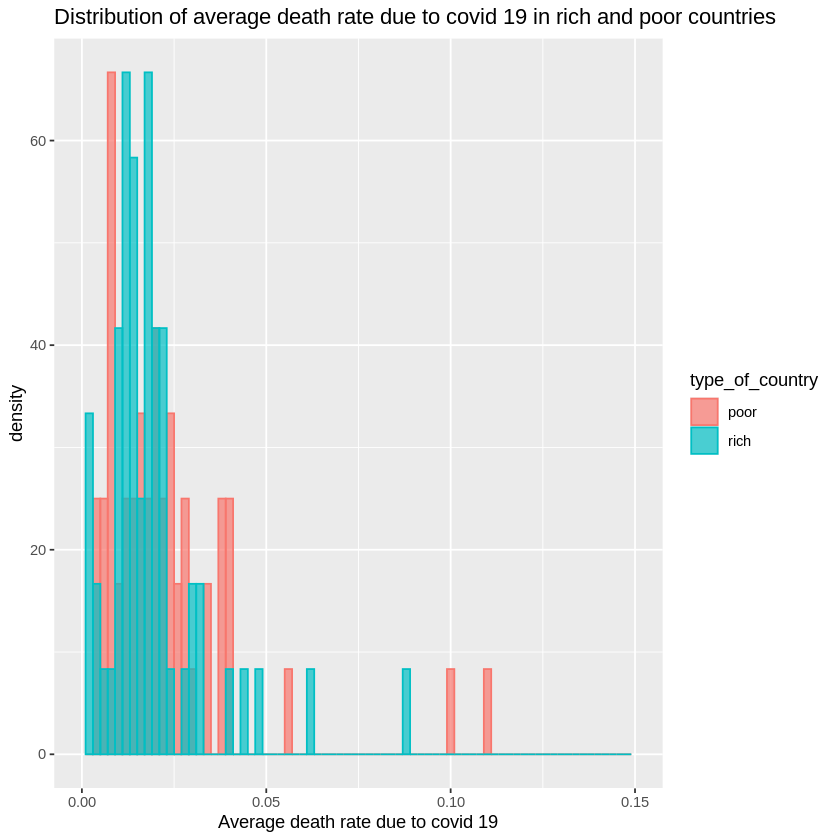

In [132]:
covid_compare